In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.random import sample_without_replacement
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import preprocessing


In [7]:
#Loading Data
df = pd.read_csv('../Project_4/data/fma_30secs.csv')
df.head()

,filename,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,000574.mp3,0.441314,0.075278,0.275232,0.001600,2609.785750,256236.018231,2521.969715,125093.515221,5466.147737,...,26.742771,-8.637082,26.087423,-0.386710,23.891684,-6.258696,24.871336,1.375780,26.662823,Rock
1,000534.mp3,0.292695,0.091941,0.087868,0.002763,1010.298595,179766.701341,1592.119431,78190.000091,1792.776766,...,47.370823,-1.805183,39.497108,-3.202246,34.362484,-3.180355,52.614132,0.088798,41.659271,Folk
2,000255.mp3,0.388428,0.084395,0.143468,0.001984,1255.780763,177158.984513,1521.012866,170832.492310,2337.811993,...,48.551289,-7.853301,40.808487,-2.617470,44.769215,-8.972784,38.892246,-2.864987,32.844204,Rock
3,000995.mp3,0.696506,0.031770,0.407609,0.000273,2782.504453,20714.043440,2450.897293,1656.762565,5539.045960,...,9.571607,-6.599209,9.725904,-0.365892,9.875140,-6.286016,9.309373,-0.737182,9.382082,Experimental
4,000777.mp3,0.418597,0.091328,0.107960,0.006224,2418.853058,570824.791781,2546.666042,173932.978317,5279.554442,...,56.395607,-3.559430,36.739960,2.450911,47.888744,-0.800907,52.027950,-1.560855,36.650490,Rock


In [8]:
# remove null values
df.dropna()

,filename,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,000574.mp3,0.441314,0.075278,0.275232,0.001600,2609.785750,2.562360e+05,2521.969715,1.250935e+05,5466.147737,...,26.742771,-8.637082,26.087423,-0.386710,23.891684,-6.258696,24.871336,1.375780,26.662823,Rock
1,000534.mp3,0.292695,0.091941,0.087868,0.002763,1010.298595,1.797667e+05,1592.119431,7.819000e+04,1792.776766,...,47.370823,-1.805183,39.497108,-3.202246,34.362484,-3.180355,52.614132,0.088798,41.659271,Folk
2,000255.mp3,0.388428,0.084395,0.143468,0.001984,1255.780763,1.771590e+05,1521.012866,1.708325e+05,2337.811993,...,48.551289,-7.853301,40.808487,-2.617470,44.769215,-8.972784,38.892246,-2.864987,32.844204,Rock
3,000995.mp3,0.696506,0.031770,0.407609,0.000273,2782.504453,2.071404e+04,2450.897293,1.656763e+03,5539.045960,...,9.571607,-6.599209,9.725904,-0.365892,9.875140,-6.286016,9.309373,-0.737182,9.382082,Experimental
4,000777.mp3,0.418597,0.091328,0.107960,0.006224,2418.853058,5.708248e+05,2546.666042,1.739330e+05,5279.554442,...,56.395607,-3.559430,36.739960,2.450911,47.888744,-0.800907,52.027950,-1.560855,36.650490,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7989,154308.mp3,0.371508,0.092021,0.068340,0.003786,1684.102130,5.766519e+05,1934.831072,3.531104e+05,3267.876238,...,90.529327,4.203887,88.260361,2.578168,108.627663,1.229802,69.146027,-3.231378,65.685440,Hip-Hop
7990,154414.mp3,0.303817,0.090807,0.127625,0.001136,2175.384457,8.446032e+05,2419.410997,2.256038e+05,4629.371800,...,45.318336,-7.242350,54.071156,-1.181491,68.359894,-7.297359,76.318565,-0.967362,86.636475,Pop
7991,154309.mp3,0.309708,0.109356,0.072136,0.004511,2581.043465,3.142707e+06,2196.357558,1.042966e+06,4931.462124,...,40.587910,-10.535615,65.553123,1.829005,104.420601,7.517188,172.519028,8.653241,166.640015,Hip-Hop
7992,154305.mp3,0.486067,0.086112,0.062706,0.001368,1048.557575,1.339963e+06,1246.649948,1.053758e+06,2268.921805,...,136.156326,14.001201,120.159660,15.255370,127.454300,9.642860,202.344238,4.686521,170.412628,Hip-Hop


In [9]:
df.drop('filename', axis =1)

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0.441314,0.075278,0.275232,0.001600,2609.785750,2.562360e+05,2521.969715,1.250935e+05,5466.147737,1.788059e+06,...,26.742771,-8.637082,26.087423,-0.386710,23.891684,-6.258696,24.871336,1.375780,26.662823,Rock
1,0.292695,0.091941,0.087868,0.002763,1010.298595,1.797667e+05,1592.119431,7.819000e+04,1792.776766,1.334504e+06,...,47.370823,-1.805183,39.497108,-3.202246,34.362484,-3.180355,52.614132,0.088798,41.659271,Folk
2,0.388428,0.084395,0.143468,0.001984,1255.780763,1.771590e+05,1521.012866,1.708325e+05,2337.811993,1.217803e+06,...,48.551289,-7.853301,40.808487,-2.617470,44.769215,-8.972784,38.892246,-2.864987,32.844204,Rock
3,0.696506,0.031770,0.407609,0.000273,2782.504453,2.071404e+04,2450.897293,1.656763e+03,5539.045960,4.809832e+04,...,9.571607,-6.599209,9.725904,-0.365892,9.875140,-6.286016,9.309373,-0.737182,9.382082,Experimental
4,0.418597,0.091328,0.107960,0.006224,2418.853058,5.708248e+05,2546.666042,1.739330e+05,5279.554442,2.005530e+06,...,56.395607,-3.559430,36.739960,2.450911,47.888744,-0.800907,52.027950,-1.560855,36.650490,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7989,0.371508,0.092021,0.068340,0.003786,1684.102130,5.766519e+05,1934.831072,3.531104e+05,3267.876238,2.954870e+06,...,90.529327,4.203887,88.260361,2.578168,108.627663,1.229802,69.146027,-3.231378,65.685440,Hip-Hop
7990,0.303817,0.090807,0.127625,0.001136,2175.384457,8.446032e+05,2419.410997,2.256038e+05,4629.371800,3.583311e+06,...,45.318336,-7.242350,54.071156,-1.181491,68.359894,-7.297359,76.318565,-0.967362,86.636475,Pop
7991,0.309708,0.109356,0.072136,0.004511,2581.043465,3.142707e+06,2196.357558,1.042966e+06,4931.462124,9.546548e+06,...,40.587910,-10.535615,65.553123,1.829005,104.420601,7.517188,172.519028,8.653241,166.640015,Hip-Hop
7992,0.486067,0.086112,0.062706,0.001368,1048.557575,1.339963e+06,1246.649948,1.053758e+06,2268.921805,6.032222e+06,...,136.156326,14.001201,120.159660,15.255370,127.454300,9.642860,202.344238,4.686521,170.412628,Hip-Hop


In [10]:
# converting string labels into numbers
le = preprocessing.LabelEncoder()
X = df.drop(['label','filename'], axis = 1)
y = le.fit_transform(df.label.values)

In [11]:
#Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
# Scaling the X data by using StandardScaler()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 0.0510627 ,  1.29154985, -1.33276881, ..., -0.20512555,
         0.22991048, -0.22016925],
       [-0.25340786, -0.2906785 , -0.073091  , ..., -0.3045616 ,
        -1.37900881, -0.28930418],
       [ 0.93893615, -0.34146356,  0.58810899, ...,  0.16479805,
        -1.91100051, -0.50287672],
       ...,
       [ 0.2795708 ,  0.16766173, -1.03238599, ..., -0.75794979,
         0.29836808, -0.23886918],
       [ 0.59411903, -1.09751611, -0.79526929, ..., -0.35899893,
        -0.07133563, -0.62958334],
       [ 0.66322261,  0.84291705,  0.92077402, ..., -0.49542352,
         1.09474368, -0.548162  ]])

k: 1, Train/Test Score: 1.000/0.458
k: 3, Train/Test Score: 0.696/0.457
k: 5, Train/Test Score: 0.644/0.477
k: 7, Train/Test Score: 0.606/0.476
k: 9, Train/Test Score: 0.580/0.479
k: 11, Train/Test Score: 0.565/0.484
k: 13, Train/Test Score: 0.556/0.487
k: 15, Train/Test Score: 0.540/0.493
k: 17, Train/Test Score: 0.531/0.492
k: 19, Train/Test Score: 0.527/0.490


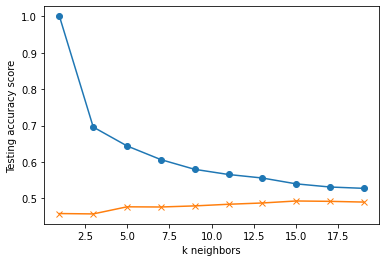

In [13]:
#Generating Model 
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")  
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()

In [14]:
# Choose the best k, and refit the KNN classifier by using that k value.
# Print the score for the test data.
# YOUR CODE HERE
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
print('k=3 train Accuracy: %.3f' % knn.score(X_train_scaled, y_train))
print('k=3 test Accuracy: %.3f' % knn.score(X_test_scaled, y_test))

k=3 train Accuracy: 0.696
k=3 test Accuracy: 0.457


In [16]:
from joblib import dump, load
dump(knn, 'Model/30_sec-model_knn.joblib')

['Model/30_sec-model_knn.joblib']